# Webscraping

We'll need some packages to start, `requests`,  `beautifulsoup4` and `selenium`. Requesting elements from a static web page is very straightforward. Let's take an example by trying to grab and plot the table of multiple Olympic medalists from Wikipedia then create a barplot of which sports have the most multiple medal winners. 

First we have to grab the data from the url, then pass it to beautifulsoup4, which parses the html, then pass it to pandas. First let's import the packages we need.

In [1]:
import requests as rq
import bs4
import pandas as pd

We then need to read the web page into data.

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_multiple_Olympic_gold_medalists'
page = rq.get(url)
## print out the first 200 characters just to see what it looks like
page.text[0 : 99]

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-l'

Now let's read the page into bs4. Then we want to find the tables in the page. We add the class and wikitable information to specify which tables that we want. If you want to find classes, you can use a web tool, like selectorgadget or viewing the page source.

In [3]:
bs4page = bs4.BeautifulSoup(page.text, 'html.parser')
tables = bs4page.find_all('table',{'class':"wikitable"})

Now we should take the html that we've saved, then read it into pandas. Fortunately, pandas has a `read_html` method. So, we convert our tables to strings then read it in. Since there's multiple tables, we grab the first one. 

In [8]:
from io import StringIO
# Read the table from the StringIO object into pandas
# Note most recent version of pandas won't accept a string as input, it needs to be passed through stringio
medals = pd.read_html(StringIO(str(tables[0])))[0]
medals = medals.dropna()
medals.head()

,No.,Athlete,Nation,Sport,Years,Games,Gender,Gold,Silver,Bronze,Total
0,1,Michael Phelps,United States,Swimming,2000–2016,Summer,M,23.0,3.0,2.0,28.0
1,2,Larisa Latynina,Soviet Union,Gymnastics,1956–1964,Summer,F,9.0,5.0,4.0,18.0
2,3,Paavo Nurmi,Finland,Athletics,1920–1928,Summer,M,9.0,3.0,0.0,12.0
3,4,Mark Spitz,United States,Swimming,1968–1972,Summer,M,9.0,1.0,1.0,11.0
4,5,Carl Lewis,United States,Athletics,1984–1996,Summer,M,9.0,1.0,0.0,10.0


Now we're in a position to build our plot. Let's look at the count of 4 or more medal winers by sport and games.

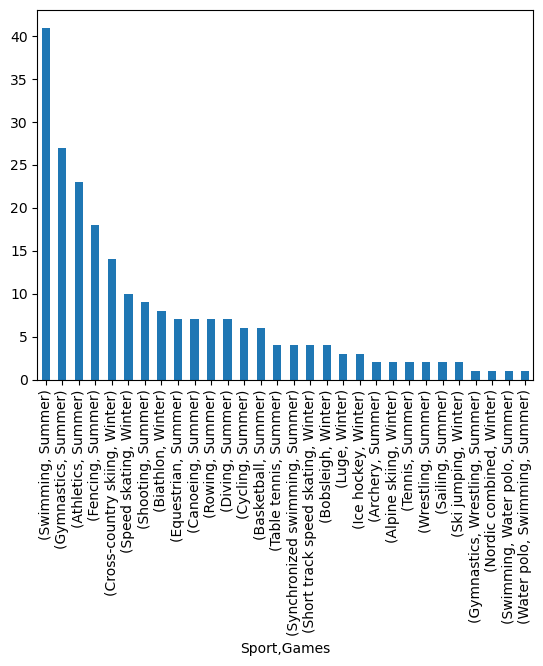

In [9]:
medals[['Sport', 'Games']].value_counts().plot.bar();

## Selenium

If the page has javacript, your basic web scraping may not work. In this case, you not only need to get and parse the page, but also to interact with the javascript. For this, enter Selenium. This is a python browser that allows you to automate web navigation. For this class, we're going to work on static web pages, so won't need Selenium.